# Comportamiento emergente: colonias de hormigas

**Autor**: José A. Troyano.   **Última modificación:** 7/3/2018

Este _notebook_ inlcuye una sencilla implementación en Python de un algoritmo de colonia de hormigas(<A href='https://es.wikipedia.org/wiki/Algoritmo_de_la_colonia_de_hormigas'>ACO</A>) inicialmente propuesto Marco Dorigo en 1992 como método para buscar el camino óptimo en un grafo. Los algoritmos basados en colonias de hormigas son un tipo de algoritmo de <A href='https://es.wikipedia.org/wiki/Inteligencia_de_enjambre'>inteligencia de enjambre</A> en el que un grupo de agentes simples presentan un comportamiento colectivo complejo habitualmente a partir de:
- Un comportamiento indiviual simple y,
- una toma de decisiones individuales basada en algún tipo de información compartida.

Este tipo de algoritmos se aplican principalmente a problemas de optimización y planificación. Una de sus mayores fortalezas es la capacidad de adaptarse a cambios en tiempo real (como por ejemplo en las condiciones de una red de transporte o comunicaciones). En este notebook se aplicará esta idea a un pequeño juego consistente en conducir las hormigas desde el hormiguero a la comida y viceversa. No se trata de reproducir exactamente el comportamiento de las hormigas reales, sino de mostrar cómo con unas reglas de decisión simples se puede conseguir un objetivo colectivo. 

Las hormigas de nuestro algoritmo se desenvuelven en un universo cuadricular similar al que usamos en el notebook de Conway. Hay cuatro tipo de celdas:
- **El hormiguero:** una celda de la que salen todas las hormigas y a la que vuelven para depositar la comida que han encontrado. En la simulación se representarán mediante un cuadrado negro.
- **La comida:** una celda en la que hay comida ilimitada. Las hormigas que no llevan carga deben buscarla, coger una unidad de comida y llevarla al hormiguero. En la simulación se representarán mediante un cuadrado naranja.
- **Los obstáculos:** celdas por las que las hormigas no pueden pasar. En la simulación se representarán mediante cuadrados azules (como charquitos de agua que las hormigas no pueden pisar). 
- **Celdas transitables:** el resto de las celdas por las que las hormigas deberán encontrar caminos de ida y vuelta al hormiguero. En la simulación se representarán mediante celdas en blanco.

Las hormigas, a su vez, podrán encontrarse en dos situaciones:
- **Buscando comida:** habrán salido del hormiguero y estarán buscando el camino a la comida. En la simulación se representarán mediante círculos negros que se mueven por la cuadrícula.
- **Buscando el hormiguero:** habrán encontrado comida e irán cargadas de vuelta al hormiguero. En la simulación se representarán mediante círculos naranjas que se mueven por la cuadrícula.

El notebook inlcuye tres estrategias de movimiento de las hormigas: aleatoria, basada en memoria, y basada en feromonas:

- **Movimiento aleatorio:** es totalmente inieficiente, solo muy ocasionalmente una hormiga consigue llevar comida al hormiguero. 
- **Movimiento basado en memoria**: cada hormiga _recuerda_ en qué celdas han estado para no volver a pasar por ellas. Implica una gran complejidad en la toma de decisiones de las hormigas ya que deben ser capaces de almacenar mucha información. A pesar de ello, la mejora que se obtiene es mucho menor que la del método basado en feromonas.  
- **Movimiento basado en feromonas**: es la estrategia que propicia el comportamiento emergente y, con diferencia, la que mejor rendimiento tiene. Se basa en que las hormigas van dejando pistas (feromonas) en las celdas que van visitando, que son usadas por otras hormigas para tomar sus decisiones cuando pasen por esa celda. 

Para que no haya una acumulación excesiva de feromona, esta se va _evaporando_ poco a poco con el paso del tiempo. En función de si las hormigas van buscando comida o el hormiguero, estas dejan dos tipos de feromonas:
- **Feromona de hormiguero:** en menor cantidad cuanto más tiempo haga que la hormiga abandonó el hormiguero.
- **Feromona de comida:** en menor cantidad cuanto más tiempo haga que la hormiga abandonó la zona de comida.

Solo con esa información, y con una regla de decisión simple para cada hormiga, es sorprendente cómo el comportamiento colectivo de la colonia _se ordena_ para conseguir el objetivo de que la comida llegue al hormiguero.



### Una brevísima introducción a la Orientación a Objetos
En este notebook se usa un estilo de programación Orientado a Objetos (<A href='https://es.wikipedia.org/wiki/Programaci%C3%B3n_orientada_a_objetos'>OO</A>) que encaja muy bien con el problema que se necesita modelar. En este estilo de programación los datos y las funciones se encapulan en una entidad denominada _objeto_. Los elementos básicos de los objetos son:
- **Atributos:** datos que configuran el estado del objeto en cada momento.
- **Métodos:** funciones que permiten consultar o modificar el estado del objeto.

Para escribir un programa OO se definen _clases_ en las que se especifican las características (atributos y métdodos) de un tipo de objetos. A partir de las clases se pueden crear tantos objetos de ella como sean necesarios mediante un método especial denominado _constructor_. En este notebook se usan dos clases:
- **Universo:** para representar las celdas donde se moverán las hormigas y algunos aspectos físicos como el tiempo y la evaporación de la feromona. Solo habrá un universo, es lo que en la jerga informática se conoce como clase _singleton_.
- **Hormiga:** que representa el estado de las hormigas y sus reglas de decisión individuales.

El notebook está organizado (en base al diseño anterior) en tres secciones:
1. La clase _Hormiga_
2. La clase _Universo_
3. Animación

La más importante es la primera, que es la que recoge las reglas de comportamiento de las hormigas. En concreto, las funciones que determinan las decisiones de movimiento basadas en feromonas y que son las responsables del comportamiento emergente del sistema.

### ¿Cómo usar el notebook? 
A pesar de que la implementación de este notebook es más compleja que la del notebook de Conway, también está diseñado para que cualquiera (inlcuso sin conocimientos sobre programación) pueda experimentar con él. No se repetirán aquí las instrucciones genéricas de ejecución de notebooks que se pueden consultar en el notebook de Conway. Estos son los detalles de uso específico para este notebook de hormigas:

- **Lectura de un universo hormiguero**: En la carpeta <code>./hormigueros/</code> hay una serie de ficheros que contienen distintas configuraciones de hormigueros codificadas de una forma muy simple con números (0: 'celda de paso', 1: 'hormiguero', 2: 'comida' y 3: 'obstáculo'). Para crear un universo a partir de uno de estos ficheros basta con llamar al constructor <code>Universo</code> indicándole el nombre del fichero correspondiente y guardar su resultado en una variable. Por ejemplo:

<code>        universo = Universo('./hormigueros/universo-con-obstaculos.txt')</code>

- **La celda de código final de la sección 3**: En la última celda de código del notebook hay preparadas varias instrucciones como la anterior para probar cómo evolucionan diferentes configuraciones de hormigueros. Al igual que en el notebook de Conway se pueden activar y desactivar mediante <code>#</code> para probar el funcionamiento de cada una.

- **Creación de nuevos ficheros hormiguero**: Los ficheros hormiguero son ficheros de texto que pueden editarse con cualquier editor _plano_ (por ejemplo Notepad de Windows).

Una primera forma de uso de este notebook es probar todas las configuraciones propuestas y aventurarse a crear ficheros con nuevos _universos hormigueros_. Hay una limitación técnica debida al modo interactivo de simulación que se ha implementado, si los hormigueros son muy grandes (más de 100 celdas de lado) la simulación se enlentece.


### ¿Cómo cambiar el notebook?
Para aquellos que quieran avanzar un poco más, y estén dispuestos a modificar ligeramente el código, existe la opción de modificar el valor de los parámetros de la simulación. No es necesario conocer Python para hacerlo, pero sí tener claro el concepto de función (o método) y cómo se pasan parámetros a las funciones. 

Los dos parámetros que se pueden modificar están disponibles en el constructor de la clase <code>Universo</code> y son:
- **hormigas:** número de hormigas de la colonia. Por defecto son 30 y se puede elegir cualquier número.
- **tasa_evaporacion:** proporción de feromona que se pierde en cada unidad de tiempo. Por defecto es 0.001 y se puede probar cualquier número entre 0 y 1. 



### ¿Cómo ampliar el notebook?
Por último, y solo para los que conozcan el lenguaje Python, está el camino más abierto y sin marcas de feromonas ;) Se trata de implementar nuevas estrategias para las hormigas, lo que implicaría seguramemnte implementar nuevos elementos (métodos, atributos, clases ...). Tres ideas, por ejemplo, son:

- Experimentar con distintas funciones (en función del tiempo que la hormiga lleva explorando) para calcular la feromona que las hormigas dejan en cada celda.
- Probar funciones de cálculo de feromona que no dependan solo del tiempo de exploración sino, por ejemplo, de la feromona que hay en la celda actual.
- Probar una función no lineal de evaporación de feromonas. Por ejemplo, se puede establecer que cuando la concentración de feromona sea alta la evaporación sea más lenta que cuando hay poca feromona en una celda.

Ya podemos empezar, lo primero será ejecutar la siguiente celda de código en la que se _importan_ los elementos que necesitaremos en el resto del notebook:

In [1]:
%matplotlib notebook
from matplotlib import pylab as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random

## 1. La clase _Hormiga_

Esta sección contiene la implementación de la clase <code>Hormiga</code>. Todos los elementos de la clase están explicados en el propio código mediante comentarios. Los más significativos, y responsables del comportamiento emergente de la colonia, son los correspondientes al movimiento basado en feromonas:

- **movimientos_optimos:** método que calcula los movimientos optimos en función de las feromonas de las celdas circundantes
- **movimiento_guiado_por_feromona:** método con la estrategia de movimiento basada en feromonas que varía según si la hormiga está buscando comida o el hormiguero
- **incremento_de_feromona:** método que calcula el incremento de feromona en función del tiempo de exploración de la hormiga
- **movimiento_hacia_comida:** método que lleva a cabo un movimiento hacia la comida siguiendo la pista de la feromona
- **movimiento_hacia_hormiguero:** método que lleva a cabo un movimiento hacia el hormiguero siguiendo la pista de la feromona

In [2]:
class Hormiga:
    '''Clase para modelar una hormiga'''

    def __init__(self, fila, columna, universo, cargada=False, criterio_movimiento='feromona'):
        ''' Constructor
        
        Construye objetos de la clase Hormiga. Las hormigas tienen atributos 'fijos' cuyo valor no cambia 
        nunca, y atributos 'cambiantes' que configuran su estado que cambia a medida que la hormiga evoluciona.
        
        Atributos fijos:
            - universo: universo al que pertenece la hormiga
            - criterio_movimiento: criterio de movimiento. Por defecto es 'feromona', también está disponible 'aleatorio'
        Atributos cambiantes:
            - fila: fila de la celda del universo en la que se encuentra la hormiga en cada momento
            - columna: columna de la celda del universo en la que se encuentra la hormiga en cada momento
            - cargada: True si la hormiga lleva comida, y False si no lleva comida
            - momento_salida_hormiguero: último instante de tiempo en el que salió del hormiguero
            - momento_salida_comida: último instante de tiempo en el que salió de la comida
            - ultimas_celdas_visitadas: historia de celdas visitadas (para movimiento guiado por memoria)
        '''
        # Atributos fijos
        self.universo = universo
        self.criterio_movimiento = criterio_movimiento
        
        # Atributos variables
        self.fila = fila
        self.columna = columna
        self.cargada = cargada
        self.momento_salida_hormiguero = 1
        self.momento_salida_comida = np.NaN
        self.ultimas_celdas_visitadas = set()
        
    
    #-------------------------------------------------------------------------------------
    # Acciones básicas de las hormigas
    #-------------------------------------------------------------------------------------
    def movimiento(self):
        ''' La hormiga se mueve un paso
        
        Utiliza un método distinto en función de su criterio de movimiento.
        '''
        if self.criterio_movimiento == 'aleatorio':
            self.movimiento_aleatorio()
        elif self.criterio_movimiento == 'memoria':
            self.movimiento_guiado_por_memoria()
        elif self.criterio_movimiento == 'feromona':
            self.movimiento_guiado_por_feromona()
        else:
            # El criterio no está definido, usamos por defecto el de 'feromona'
            self.movimiento_guiado_por_feromona()
        
        
    def movimientos_posibles(self):
        ''' Calcula los movimientos posibles de una hormiga dada su posición
        
        Produce como salida una lista de coordenadas con los movimientos posibles. Se exploran
        las 8 celdas circundantes, y se excluyen las que salen fuera del universo y los obstáculos
        (codificados con un 3 en los mapas de los universos).
        '''
        movimientos = []
        for f in range(self.fila-1, self.fila+2):
            for c in range(self.columna-1, self.columna+2):
                if 0 <=f<self.universo.lado and 0<=c<self.universo.lado and self.universo.celdas[f, c]!=3:
                    if not (f==self.fila and c==self.columna):
                        movimientos.append((f,c))
        return movimientos
    
    
    def esta_en_hormiguero(self):
        ''' Determina si una hormiga se encuentra en el hormiguero'''
        return self.fila == self.universo.y_hormiguero and self.columna == self.universo.x_hormiguero
    
    
    def esta_en_comida(self):
        ''' Determina si una hormiga se encuentra en la comida'''
        return self.fila == self.universo.y_comida and self.columna == self.universo.x_comida
    

    def elegir_opcion_de_movimiento(self, opciones):
        ''' Elige una opción de movimiento y la lleva a cabo
        
        Recibe una lista de coordenadas con posibles movimientos. Elige una aleatoriamente y cambia el
        estado de la hormiga. Los atributos de la hormiga que pueden cambiar tras un movimiento son:
            - fila: cambia siempre
            - columna: cambia siempre
            - cargada: solo si entra/sale del hormiguero/comida
            - momento_salida_hormiguero: solo cuando sale del hormiguero
            - momento_salida_comida: solo cuando sale de la comida
        
        Además de cambiar el estado de la hormiga, este método también puede cambiar el estado del universo.
        En concreto puede cambiar:
            - universo.comida: se incrementa en 1 cuando una hormiga con comida llega al hormiguero
        '''
        eleccion = random.randrange(0, len(opciones))
        self.fila = opciones[eleccion][0]
        self.columna = opciones[eleccion][1]
        if self.esta_en_hormiguero() and self.cargada == True:
            self.universo.comida += 1
        if self.esta_en_hormiguero():
            self.cargada = False
            self.momento_salida_hormiguero = self.universo.tiempo
        if self.esta_en_comida():
            self.cargada = True
            self.momento_salida_comida = self.universo.tiempo
        
        
    #-------------------------------------------------------------------------------------
    # Movimiento aleatorio
    #-------------------------------------------------------------------------------------
    def movimiento_aleatorio(self):
        ''' Lleva a cabo un movimiento aleatorio
        
        Calcula todos los movimientos posibles y se los proporciona al método elegir_opcion_de_movimiento
        '''
        opciones = self.movimientos_posibles()
        self.elegir_opcion_de_movimiento(opciones)


    #-------------------------------------------------------------------------------------
    # Movimiento guiado por memoria
    #-------------------------------------------------------------------------------------
    def movimiento_guiado_por_memoria(self):
        ''' Lleva a cabo un movimiento intentando no repetir celdas en las que la hormiga ha estado antes
        
        Calcula todos los movimientos posibles y se comparan con las celdas que se han visitado antes. 
        Si hay movimientos que llevan a celdas nuevas, se elige entre ellos. Si no es posible ir a una celda
        nueva, se elige un movimiento de forma aleatoria.
        La historia de celdas visitadas se "borra" cuando la hormiga está en el hormiguero o en la comida.
        '''
        if self.esta_en_hormiguero() or self.esta_en_comida():
            self.ultimas_celdas_visitadas = set((self.fila, self.columna))
        opciones = [opcion for opcion in self.movimientos_posibles() if opcion not in self.ultimas_celdas_visitadas]
        if len(opciones)>0:
            self.elegir_opcion_de_movimiento(opciones)
        else:
            self.movimiento_aleatorio()
        self.ultimas_celdas_visitadas.add((self.fila, self.columna))
        

    #-------------------------------------------------------------------------------------
    # Movimiento guiado por feromonas
    #-------------------------------------------------------------------------------------
    def movimientos_optimos(self, positivo, negativo):
        ''' Calcula los movimientos optimos
        
        De todos los movimientos posibles, devuelve aquellos que maximizan el beneficio para el hormiguero.
        La decisión se toma de forma local con la información de la que dispone la hormiga:
           - feromonas de comida de las celdas circundantes
           - feromonas de hormiguero de las celdas circundantes
           
        Dependiendo del objetivo de la hormiga (ir al hormiguero o a la comida) las feromonas de comida
        y hormiguero pueden ser pistas positivas o negativas. Por esta razon, este método recibe dos mapas
        de feromonas denominados 'positivo' y 'negativo' que recibirán en, cada caso, los mapas de feromonas
        apropiados.
        El beneficio de cada celda circundante se calcula restando al valor de feromona del mapa positivo el
        valor del mapa negativo.
        '''
        opciones = self.movimientos_posibles()
        beneficios = [positivo[f,c] - negativo[f,c] for f,c in opciones]
        maximo_beneficio = max(beneficios)
        return [(f,c) for (f,c),b in zip(opciones, beneficios) if b==maximo_beneficio]
        
        
    def movimiento_guiado_por_feromona(self):
        ''' Estrategia de movimiento basada en feromonas
        
        Se decide en función de si la hormiga está cargada, o no:
            - Si está cargada se dirigirá al hormiguero. 
            - Si no está cargada se dirigirá a la comida
        '''
        if self.cargada:
            self.movimiento_hacia_hormiguero()
        else:
            self.movimiento_hacia_comida()
            
        
    def incremento_de_feromona(self, tiempo_exploracion):
        ''' Calcula el incremento de feromona en función del tiempo de exploración
        
        Será decreciente en fución del tiempo de exploración. Se ha optado por la función
        1/(100+t) pero se pueden probar muchas más.
        '''
        return 1/(100+tiempo_exploracion)
    
  
    def movimiento_hacia_comida(self):
        ''' Lleva a cabo un movimiento hacia la comida
        
        Elige aleatoriamente entre los movimientos óptimos e incrementa la feromona del hormiguero
        en el universo. El incremento de feromona se calcula con el método incremento_de_feromona y
        será menor cuanto más tiempo haya pasado desde que abandonó el hormiguero.
        '''
        tiempo_exploracion = self.universo.tiempo - self.momento_salida_hormiguero
        opciones = self.movimientos_optimos(self.universo.feromona_comida, self.universo.feromona_hormiguero)
        self.elegir_opcion_de_movimiento(opciones)
        incremento = self.incremento_de_feromona(tiempo_exploracion)
        self.universo.feromona_hormiguero[self.fila, self.columna] += incremento 
        

    def movimiento_hacia_hormiguero(self):
        ''' Lleva a cabo un movimiento hacia el hormiguero
        
        Elige aleatoriamente entre los movimientos óptimos e incrementa la feromona de la comida
        en el universo. El incremento de feromona se calcula con el método incremento_de_feromona y
        será menor cuanto más tiempo haya pasado desde que abandonó la comida.
        '''
        tiempo_exploracion = self.universo.tiempo - self.momento_salida_comida
        opciones = self.movimientos_optimos(self.universo.feromona_hormiguero, self.universo.feromona_comida)
        self.elegir_opcion_de_movimiento(opciones)
        incremento = self.incremento_de_feromona(tiempo_exploracion)
        self.universo.feromona_comida[self.fila, self.columna] += incremento

## 2. La clase _Universo_

Esta sección contiene la implementación de la clase <code>Universo</code>. Todos los elementos de la clase están explicados en el propio código mediante comentarios. Además de la celda con la implementación de la clase, hay una pequeña celda de test que permite comprobar el aspecto de la visualización gráfica del universo.

In [3]:
class Universo:
    '''Clase para modelar un universo'''
    
    def __init__(self, fichero, hormigas=30, tasa_evaporacion=0.0001, criterio_movimiento='feromona'):
        ''' Constructor
        
        Construye objetos de la clase Universo. Los universos tienen atributos 'fijos' cuyo valor no cambia 
        nunca, y atributos 'cambiantes' que configuran su estado que cambia a medida que el universo evoluciona.
        
        Atributos fijos:
            - lado: número de celdas de cada lado del cuadrado que constituye el universo
            - celdas: matriz con el mapa del universo {0:'vacia', 1:'hormiguero', 2:'comida', 3:'obstaculo'}
            - tasa_evaporacion: proporción de feromona que se evapora en cada iteración (por defecto, 0.0001)
            - colonia: hormigas en el universo. El estado de cada hormiga cambia, pero las hormigas son las mismas
        Atributos cambiantes:
            - feromona_hormiguero: matriz con el valor de feromona de hormiguero para cada celda del universo
            - feromona_comida: matriz con el valor de feromona de comida para cada celda del universo
            - tiempo: empieza en 1 y cada iteración se incrementa en 1
            - comida: unidades de comida que han llegado al hormiguero
        '''
        # Leer el mapa del universo y enmarcarlo en una matriz cuadrada
        matriz = np.genfromtxt(fichero, delimiter=',')
        self.lado = max(matriz.shape)
        self.celdas = np.zeros((self.lado, self.lado))
        self.celdas[0:matriz.shape[0], 0:matriz.shape[1]] = matriz
        
        # Matrices de las feromonas del hormiguero y la comida, y tasa de evaporación
        self.tasa_evaporacion = tasa_evaporacion
        self.feromona_hormiguero = np.zeros((self.lado, self.lado))
        self.feromona_comida = np.zeros((self.lado, self.lado))
        
        # Calcular las coordenadas de la comida, el hormiguero 
        x_hor, y_hor = self.coordenadas_no_nulas(1)
        x_com, y_com = self.coordenadas_no_nulas(2)
        if len(x_hor) != 1 or len(x_com) !=1:
            print("Solo puede haber un hormiguero y una comida, hay %d y %d"% (len(x_hor), len(x_com)))
            # Fijamos el hormiguero y la comida en las esquinas superior izquierda e inferior derecha
            self.x_hormiguero, self.y_hormiguero = 0, 0
            self.x_comida,     self.y_comida = self.lado-1, self.lado-1
        else:
            self.x_hormiguero, self.y_hormiguero = x_hor[0], y_hor[0]
            self.x_comida, self.y_comida = x_com[0], y_com[0]
        
        # Crear la colonia de hormigas (inicialmente sin carga y en el hormiguero)
        self.colonia = [Hormiga(self.x_hormiguero, self.y_hormiguero, self, 
                                criterio_movimiento=criterio_movimiento) for _ in range(hormigas)]
        
        # Crear el tiempo y el contador de comida que ha llegado al hormiguero
        self.tiempo = 1
        self.comida = 0


    def coordenadas_no_nulas(self, valor=1):
        ''' Calcula las coordenadas de las celdas que tienen algún valor significativo
        
        Usada para calcular la información requeri
        Recibe el valor a buscar (por defecto 1) y devuelve una lista de coordenadas.
        Hay un cambio de esquema de representación: se pasa del esquema fila/columna 
        (de los arrays numpy) al esquema x/y (requerido por matplotlib).
        '''
        filas, columnas = self.celdas.shape
        xs = []
        ys = []
        valores = []
        for f in range(filas):
            for c in range(columnas):
                if self.celdas[f, c] == valor:
                    xs.append(c)
                    ys.append(f)
        return (xs, ys)
    
    
    def coordenadas_hormigas(self, carga=False):
        ''' Calcula las coordenadas de las hormigas (cargadas con comida, o no)
        
        Toma como entrada un valor de carga, y produce como salida una lista con las
        coordenadas de las hormigas cuyo atributo 'cargada' coincide con ese valor.
        Hay un cambio de esquema de representación: se pasa del esquema fila/columna 
        (de los arrays numpy) al esquema x/y (requerido por matplotlib).
        '''
        xs = []
        ys = []
        for h in self.colonia:
            if h.cargada == carga:
                ys.append(h.fila)
                xs.append(h.columna)
        return (xs, ys)    
    
    
    def evaporacion_feromonas(self):
        ''' Provoca una dismimución de feromonas de hormiguero y de comida
        
        Cada vez que es ejecutada, todos los valores de feromona se reducen en la
        proporción (1-tasa_evaporacion).
        '''
        filas, columnas = self.celdas.shape
        for f in range(filas):
            for c in range(columnas):
                self.feromona_hormiguero[f,c] *= (1-self.tasa_evaporacion)
                self.feromona_comida[f,c] *= (1-self.tasa_evaporacion)

        # Hormiguero: feromona hormiguero máxima, feomona comida 0
        self.feromona_hormiguero[self.y_hormiguero, self.x_hormiguero] = self.feromona_hormiguero.max()
        self.feromona_comida[self.y_hormiguero, self.x_hormiguero] = 0

        # Comida: feromona hormiguero 0, feomona comida máxima
        self.feromona_comida[self.y_comida, self.x_comida] = self.feromona_comida.max()
        self.feromona_hormiguero[self.y_comida, self.x_comida] = 0

    
    def evoluciona(self):
        ''' Paso de evolución del universo
        
        Mover un paso a todas las hormigas, avanzar el tiempo y evaporar las feromonas.
        '''
        random.shuffle(self.colonia)
        for h in self.colonia:
            h.movimiento()
        self.tiempo += 1
        self.evaporacion_feromonas()

            
    def visualiza(self):
        ''' Genera la gráfica que representa el universo
    
            Se devuelven las variables fig, texto_iteracion, texto_comida, texto_rendimiento,
            hormigas y cargadas, para que puedan ser usadas posteriormente en la animación gráfica
            con FuncAnimation.
        '''
        # Creación de la figura y configuración de los ejes
        tam_marca = 4*60/min(self.celdas.shape)
        fig, ax = plt.subplots(figsize=(6,6))
        plt.axis('equal')
        ax.axis([-0.5,self.celdas.shape[0]-0.5,-0.5,self.celdas.shape[1]-0.5])
        ax.invert_yaxis()
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        # Cálculo de las coordenadas de los obstáculos (fijas) y de las hormigas (variable)
        xs_obs, ys_obs = self.coordenadas_no_nulas(3)
        xs_hor, ys_hor = self.coordenadas_hormigas(carga=False)
        xs_hor_car, ys_hor_car = self.coordenadas_hormigas(carga=True)
        
        # Trazado de los elementos fijos del gráfico
        celdas, = plt.plot(xs_obs, ys_obs, ls="", marker="s", color="blue", markersize= tam_marca)
        hormiguero, = plt.plot([self.x_hormiguero], [self.y_hormiguero], ls="", marker="s", color="black", markersize= tam_marca)
        comida, = plt.plot([self.x_comida], [self.y_comida], ls="", marker="s", color="orange", markersize= tam_marca)
        
        # Trazado de los elementos variables del gráfico
        hormigas, = plt.plot(xs_hor, ys_hor, ls="", marker="o", color="black", markersize= tam_marca/2)
        cargadas, = plt.plot(xs_hor_car, ys_hor_car, ls="", marker="o", color="orange", markersize= tam_marca/2)
        texto_iteracion = ax.text(0.01, -0.05, 'Iteración: 0', transform=ax.transAxes)
        texto_comida = ax.text(0.31, -0.05, 'Comida: 0', transform=ax.transAxes)
        texto_rendimiento = ax.text(0.61, -0.05, 'Rendimiento: 0.000', transform=ax.transAxes)
        texto_fer_hormiguero = ax.text(0.01, 1.01, 'Feromona de hormiguero: 0.000 (máximo), 0.000 (media)', transform=ax.transAxes)
        texto_fer_comida = ax.text(0.01, 1.05, 'Feromona de comida: 0.000 (máximo), 0.000 (media)', transform=ax.transAxes)
        
        return fig, texto_iteracion, texto_comida, texto_rendimiento, hormigas, cargadas, texto_fer_hormiguero, texto_fer_comida


<IPython.core.display.Javascript object>


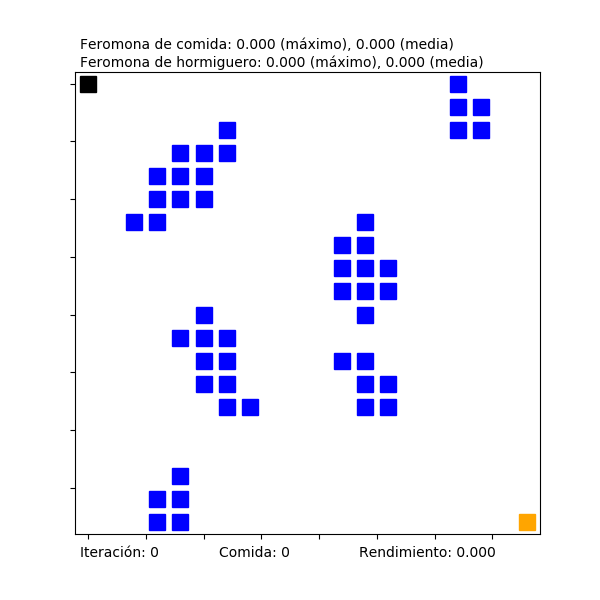

In [4]:
# Test de la visualización de universos

universo = Universo('./hormigueros/universo-con-obstaculos.txt')
#universo = Universo('./hormigueros/universo-sin-obstaculos.txt')

_ = universo.visualiza()

## 3. Animación

Al igual que en el notebook de _Conway_ se ha optado una implementación con la clase <code>FuncAnimation</code> para que la animación sea más interactiva y se muestre la evolución del sistema al mismo tiempo que se realiza la simulación. 

Seguiremos el mismo esquema basado en la función <code>siguiente_iteracion</code> para que el universo avance un paso y se compongan los elementos variables de la animación. 

En la última celda de código hay disponibles varias instrucciones de creación de universo con distintas configuraciones. Para probar una de ellas, quitar el carácter <code>#</code> del principio y ponérselo al resto. Además de la animación gráfica se muestran algunos indicadores numéricos como el número de iteraciones de la simulación, el número de unidades de comida que han llegado al hormiguero, el rendimiento (unidades de comida divididas entre el número de iteraciones) o información sobre la cantidad de feromona.

In [5]:
def siguiente_iteracion(i):
    ''' Calcula un 'fotograma' de la secuencia de evolución
    
    Será usada por la clase FuncAnimation de matplotlib para generar una secuencia de
    imágenes que de lugar a la animación.
    Además de instrucciones para componer la salida gráfica animada, inlcuye una llamada al
    método 'evoluciona' que es la que (de forma secuencial) va cambiando el estado del
    universo.
    '''
    global universo
    universo.evoluciona()
    xs_hor, ys_hor = universo.coordenadas_hormigas(carga=False)
    xs_car, ys_car = universo.coordenadas_hormigas(carga=True)
    f_h_max = universo.feromona_hormiguero.max()
    f_h_med = universo.feromona_hormiguero.mean()
    f_c_max = universo.feromona_comida.max()
    f_c_med = universo.feromona_comida.mean()
    
    hormigas.set_data(xs_hor, ys_hor)
    cargadas.set_data(xs_car, ys_car)
    texto_iteracion.set_text('Iteración: %d' % i)
    texto_comida.set_text('Comida: %d' % universo.comida)
    texto_rendimiento.set_text('Rendimiento: {:.3f}'.format(universo.comida/universo.tiempo))
    texto_fer_hormiguero.set_text('Feromona de hormiguero: {:.3f} (máximo), {:.3f} (media)'.format(f_h_max, f_h_med))
    texto_fer_comida.set_text('Feromona de comida: {:.3f} (máximo), {:.3f} (media)'.format(f_c_max, f_c_med))

    return texto_iteracion, texto_comida, texto_rendimiento, hormigas, cargadas, texto_fer_hormiguero, texto_fer_comida

<IPython.core.display.Javascript object>


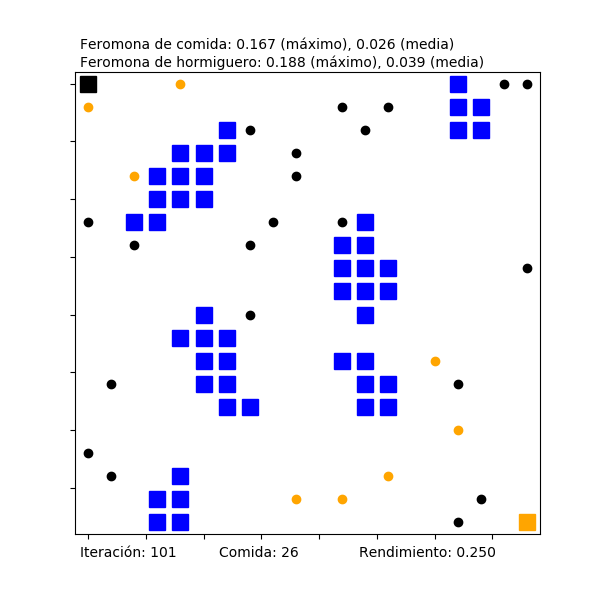

In [9]:
# Descomentar cada instrucción de creación de universo para probar cada configuración
# Si se activa una ventana con 'scroll', hacer click en el área gris de la izquierda para expandirla

#universo = Universo('./hormigueros/universo-sin-obstaculos.txt', criterio_movimiento='aleatorio')
#universo = Universo('./hormigueros/universo-con-obstaculos.txt', criterio_movimiento='aleatorio')
#universo = Universo('./hormigueros/universo-con-obstaculos-40-40.txt', criterio_movimiento='aleatorio')

#universo = Universo('./hormigueros/universo-sin-obstaculos.txt', criterio_movimiento='memoria')
#universo = Universo('./hormigueros/universo-con-obstaculos.txt', criterio_movimiento='memoria')
#universo = Universo('./hormigueros/universo-con-obstaculos-40-40.txt', criterio_movimiento='memoria')

#universo = Universo('./hormigueros/universo-sin-obstaculos.txt', criterio_movimiento='feromona')
universo = Universo('./hormigueros/universo-con-obstaculos.txt', criterio_movimiento='feromona')
#universo = Universo('./hormigueros/universo-con-obstaculos-40-40.txt', criterio_movimiento='feromona')

#universo = Universo('./hormigueros/universo-con-obstaculos.txt', hormigas=15)
#universo = Universo('./hormigueros/universo-con-obstaculos.txt', hormigas=100)

#universo = Universo('./hormigueros/universo-con-obstaculos.txt', tasa_evaporacion=0)
#universo = Universo('./hormigueros/universo-con-obstaculos.txt', tasa_evaporacion=0.9)

#universo = Universo('./hormigueros/universo-con-obstaculos-40-40.txt')
#universo = Universo('./hormigueros/universo-con-obstaculos-40-40.txt', hormigas=1000)

# Creación de la primera imagen
fig, texto_iteracion, texto_comida, texto_rendimiento, hormigas, cargadas, texto_fer_hormiguero, texto_fer_comida = universo.visualiza()

# Generación de la animación. Con 'frames' se puede cambiar el número de iteraciones 
anim = FuncAnimation(fig, siguiente_iteracion, frames=2000, repeat=False)